## Dataset Context and Project Overview

The dataset comes from a simulated scenario created by ToU.
It represents anonymized student activity data collected during the **first 4 weeks after enrollment**.
The goal of the capstone project is to build a model that can predict which students will become **“Highly Engaged”** by mid-semester based on their early activity patterns.
### Target
- **Engagement score** – the outcome we want to predict.

### Available Features
- **Gender**
- **Date of birth**
- **Age**
- **Country of residence**
- **Hours logged into the learning app**
- **Number of completed lessons**
- **Number of submitted assignments**
- **Participation in mentoring program** (yes/no)
- **Participation in in-person orientation event** (yes/no)

### Project Questions
- *Which features best predict engagement?*
- *Can new features be engineered to improve prediction?*

# Step 1: Explore and Define the Problem

## 1.1 Load and explore dataset
This section establishes a connection to the database, identifies available tables, and loads the main table (`student_data`) into a pandas DataFrame for further exploration.



In [16]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("../data/student_data.db")

# Check available tables
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';",
    conn
)
print(tables)

# Load the main table
query = "SELECT * FROM student_data;"
df = pd.read_sql_query(query, conn)

df.head()

           name
0  student_data


,Unnamed: 0,sex,age,birthdate,country,logged in,lessons,assignments,posts,mentoring,score,orientation
0,0,None,24.0,2000-06-30,Austrai,5.297479,4.0,1.0,3.0,Yes,44.452539,1.0
1,1,Female,21.0,2002-11-29,Germany,3.051044,1.0,0.0,6.0,No,18.985095,0.0
2,2,Male,21.0,2003-03-25,Other,25.042989,5.0,1.0,8.0,Yes,52.182803,0.0
3,3,Female,21.0,2003-03-25,France,6.482670,1.0,0.0,3.0,No,24.172925,1.0
4,4,Female,29.0,1994-12-28,Germany,9.786313,1.0,0.0,10.0,No,39.749603,1.0


### Interpretation
The table `student_data` contains the anonymised student-level information required for this analysis and the first few rows confirm that the expected variables (`sex`, `age`, `birthdate`, `country`, `logged in`, `lessons`, `assignments`, `posts`, `mentoring`, `score`, `orientation`) are present.


## 1.2 Exploring dataset structure

This subsection provides an overview of the dataset’s structure, including:
- number of rows and columns,
- data types of each feature.

In [2]:
# Inspect data structure and summary
df.info()

# Basic summary statistics for all columns
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   500 non-null    int64  
 1   sex          483 non-null    object 
 2   age          494 non-null    float64
 3   birthdate    488 non-null    object 
 4   country      496 non-null    object 
 5   logged in    495 non-null    float64
 6   lessons      493 non-null    float64
 7   assignments  488 non-null    float64
 8   posts        495 non-null    float64
 9   mentoring    483 non-null    object 
 10  score        495 non-null    float64
 11  orientation  494 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 47.0+ KB


,Unnamed: 0,sex,age,birthdate,country,logged in,lessons,assignments,posts,mentoring,score,orientation
count,500.000000,483,494.000000,488,496,495.000000,493.000000,488.000000,495.000000,483,495.000000,494.000000
unique,NaN,7,NaN,468,11,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,Female,NaN,2004-02-20,Other,NaN,NaN,NaN,NaN,No,NaN,NaN
freq,NaN,252,NaN,3,143,NaN,NaN,NaN,NaN,283,NaN,NaN
mean,249.500000,NaN,23.864372,NaN,NaN,14.066915,3.389452,0.561475,5.357576,NaN,34.998790,0.619433
std,144.481833,NaN,10.999715,NaN,NaN,13.577602,3.978914,1.311891,2.399270,NaN,15.630228,0.486018
min,0.000000,NaN,16.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.687008,0.000000
25%,124.750000,NaN,20.000000,NaN,NaN,2.093709,1.000000,0.000000,4.000000,NaN,22.772791,0.000000
50%,249.500000,NaN,22.000000,NaN,NaN,10.931016,2.000000,0.000000,5.000000,NaN,32.137461,1.000000
75%,374.250000,NaN,25.000000,NaN,NaN,22.296099,5.000000,1.000000,7.000000,NaN,46.992596,1.000000


### Interpretation

- The dataset contains 500 observations and 12 columns, including an index column (`Unnamed: 0`). This column does not carry analytical meaning but is retained at this stage, as cleaning steps are not part of this section.
- The remaining variables consist of a mix of numeric (`float64`, `int64`) and categorical (`object`) data types.
- All analytical variables are present in the expected format: behavioural features (`logged in`, `lessons`, `assignments`, `posts`, `score`) are numeric, while demographic or program-related features (`sex`, `birthdate`, `country`, `mentoring`) are stored as categorical text.


## 1.3 Missing values overview

This subsection examines the amount of missing data present in each variable.


In [3]:
# Count missing values per column
df.isna().sum()

Unnamed: 0      0
sex            17
age             6
birthdate      12
country         4
logged in       5
lessons         7
assignments    12
posts           5
mentoring      17
score           5
orientation     6
dtype: int64

### Interpretation

- All variables contain some missing values, but the amounts are relatively small compared to the total dataset size of 500 rows.
- Categorical variables such as `sex` and `mentoring` show the highest number of missing entries, while numerical variables generally have fewer missing observations.
- At this stage, the missing values do not prevent exploratory analysis, but they should be handled in later steps of the workflow.


# 2. Summarize data with statistics

## 2.1 Descriptive statistics for numerical variables
These statistics include measures of central tendency (mean and median) and measures of variability (standard deviation, minimum, maximum and quartiles).
Together, these values offer an initial view of how each numerical variable is distributed and how spread out the observations are.


In [4]:
# Descriptive statistics for numerical variables
df.describe()

,Unnamed: 0,age,logged in,lessons,assignments,posts,score,orientation
count,500.000000,494.000000,495.000000,493.000000,488.000000,495.000000,495.000000,494.000000
mean,249.500000,23.864372,14.066915,3.389452,0.561475,5.357576,34.998790,0.619433
std,144.481833,10.999715,13.577602,3.978914,1.311891,2.399270,15.630228,0.486018
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.687008,0.000000
25%,124.750000,20.000000,2.093709,1.000000,0.000000,4.000000,22.772791,0.000000
50%,249.500000,22.000000,10.931016,2.000000,0.000000,5.000000,32.137461,1.000000
75%,374.250000,25.000000,22.296099,5.000000,1.000000,7.000000,46.992596,1.000000
max,499.000000,125.000000,85.488737,44.000000,9.000000,14.000000,82.839089,1.000000


### Interpretation

- The numerical variables show a wide range of values. For example, `logged in`, `lessons`, `assignments`, and `posts` each display different levels of activity across students.
- Mean values are generally higher than their corresponding medians (50%) for several behavioural variables, suggesting that some students have much higher activity levels than others.
- The standard deviations indicate substantial spread in variables such as `logged in` and `score`, meaning individual engagement levels vary considerably across students.
- Minimum and maximum values highlight the full span of observed behaviours and provide initial insight into the diversity within the dataset.


## 2.2 Mode and range

Mode provides the most frequently occurring value in a variable, while the range indicates the spread between the smallest and largest observations.  

In [17]:
# Calculate mode for all variables
modes = df.mode().iloc[0]

# Calculate range for numerical variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
ranges = df[numeric_cols].max() - df[numeric_cols].min()

modes, ranges

(Unnamed: 0              0
 sex                Female
 age                  20.0
 birthdate      2003-06-21
 country             Other
 logged in             0.0
 lessons               2.0
 assignments           0.0
 posts                 5.0
 mentoring              No
 score            0.687008
 orientation           1.0
 Name: 0, dtype: object,
 Unnamed: 0     499.000000
 age            109.000000
 logged in       85.488737
 lessons         44.000000
 assignments      9.000000
 posts           14.000000
 score           82.152081
 orientation      1.000000
 dtype: float64)

### Interpretation

- The mode values identify the most frequently occurring entries for each feature. For example, the mode of `sex` is **“Female”**, indicating that this is the most common gender reported in the dataset. Similarly, the mode for `mentoring` is **“No”**, showing that a majority of students did not participate in the mentoring.
- The numerical ranges show how widely values differ across observations. For instance, the `logged in` variable spans from its minimum to maximum value by a substantial margin, reflecting large variation in how much time students spend in the learning app. In contrast, variables with smaller ranges (such as `assignments`) suggest more uniform behaviour across students.

# 3. Visualising key patterns

## 3.1 Histograms

Histograms help to visualise the distribution of numerical variables. They reveal whether values are concentrated, spread out, skewed, or include potential outliers.  

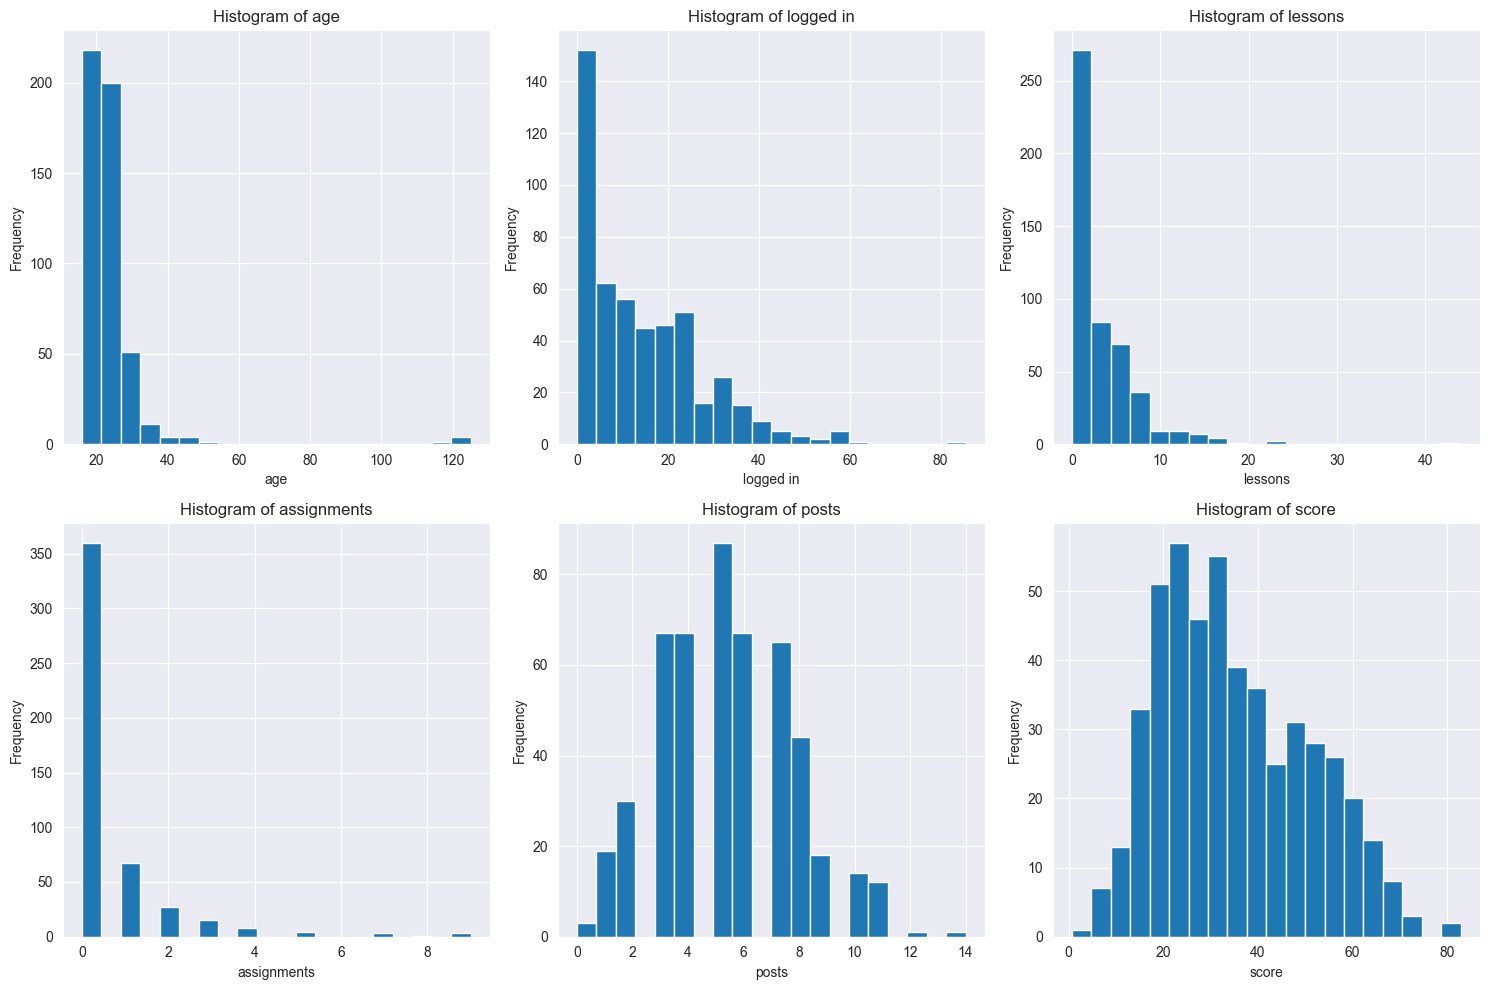

In [15]:
import matplotlib.pyplot as plt

# Select numerical columns
numeric_cols = ["age", "logged in", "lessons", "assignments", "posts", "score"]

# Grid configuration: 3 columns per row
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten grid to iterate easily
axes = axes.flatten()

# Plot each histogram on its own subplot
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=20)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove any unused plot areas (if number of columns doesn't fill grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Interpretation

- `logged in`, `lessons`, and `assignments` show strong right-skewed distributions, with many students having low values and a smaller number showing high activity.
- `age` displays a concentrated cluster around younger age ranges, with a small number of unusually high values visible as outliers.
- `score` appears broadly distributed, suggesting variability in engagement levels across students.
- `posts` shows a more balanced distribution compared to the other behavioural variables, though still with noticeable spread.


## 3.2 Box plots

Box plots provide a visual summary of the distribution of numerical variables, including their medians, quartiles, and potential outliers.
They help identify unusual values and assess how spread out each variable is.


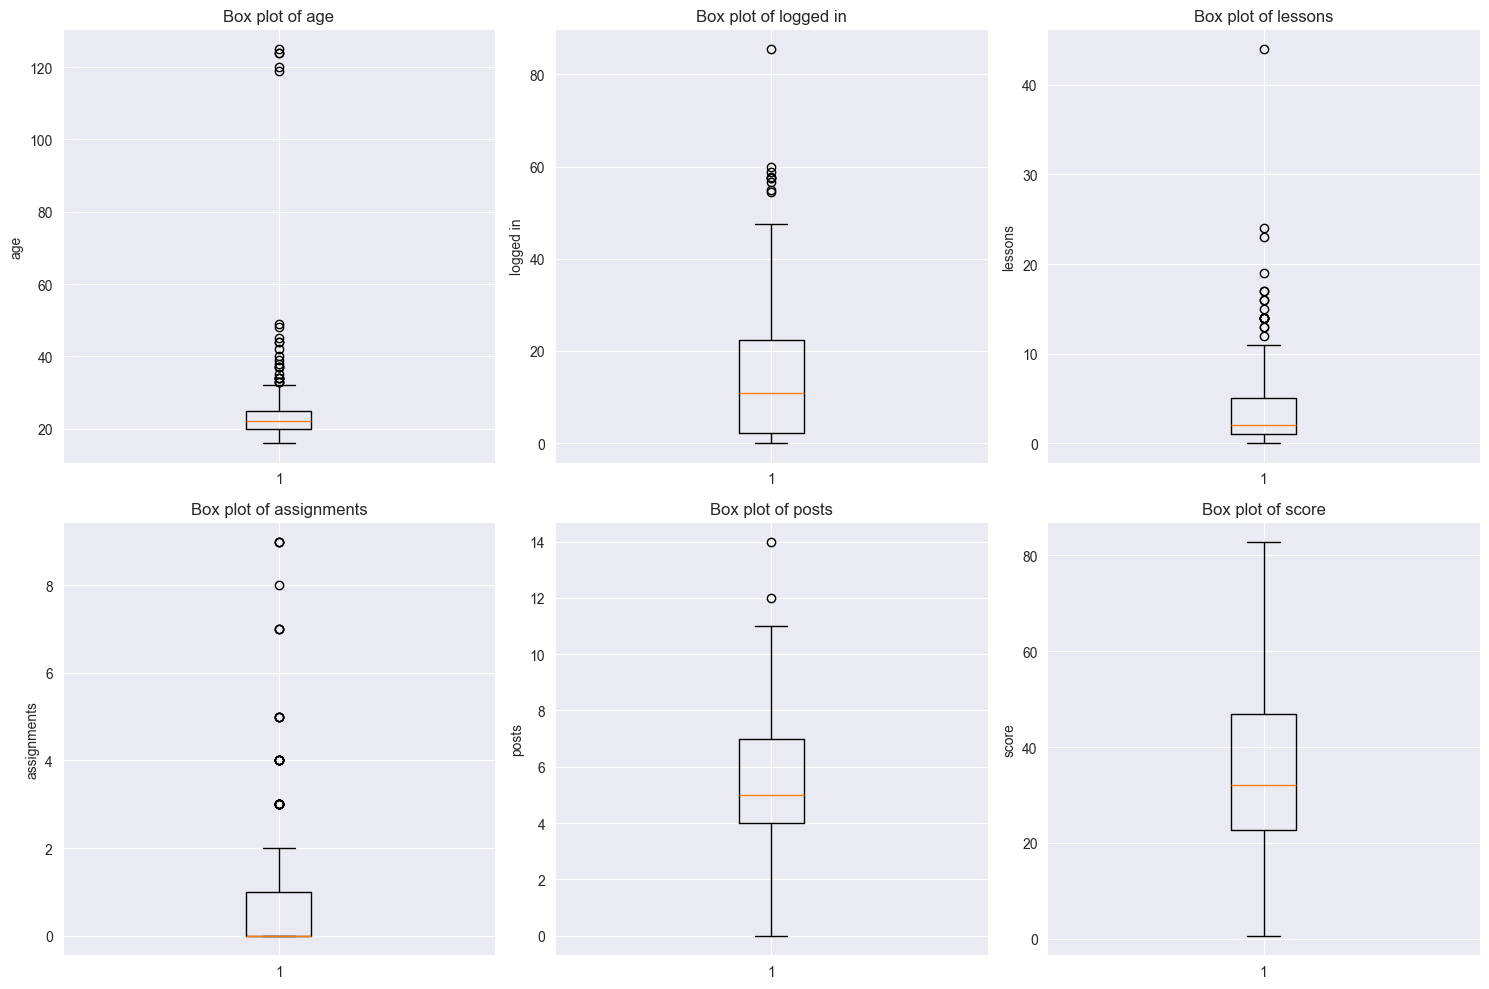

In [18]:
import matplotlib.pyplot as plt

# Numerical columns
numeric_cols = ["age", "logged in", "lessons", "assignments", "posts", "score"]

# Grid setup: 3 columns per row
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f"Box plot of {col}")
    axes[i].set_ylabel(col)

# Remove empty axes (when number of variables doesn't fill grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Interpretation

- The box plot for `age` displays a few clear outliers above the upper whisker, reflecting unusually high age values compared to the rest of the dataset.
- `logged in` shows a wide interquartile range and several high-value outliers, indicating that while most students spend limited time in the app, a small group is highly active.
- `lessons` and `assignments` both show concentrations near lower values, with multiple outliers representing students who complete significantly more tasks than average.
- The distribution of `score` also includes some high-value outliers, reflecting variation in engagement levels across students.
- Overall, the box plots highlight that several behavioural features are positively skewed, with a small number of highly active students influencing the upper range.


## 3.3 Scatter plots
A multivariate scatter plot was generated using three behavioural variables simultaneously. Lessons and assignments represent two core measures of early student activity, while `logged in` hours provide additional behavioural context through marker size. The engagement score (`score`) is encoded using a bold red–yellow–green gradient to reveal how it varies across different activity levels.

This visualization makes it possible to inspect early patterns, potential irregularities and how different behavioural variables interact.

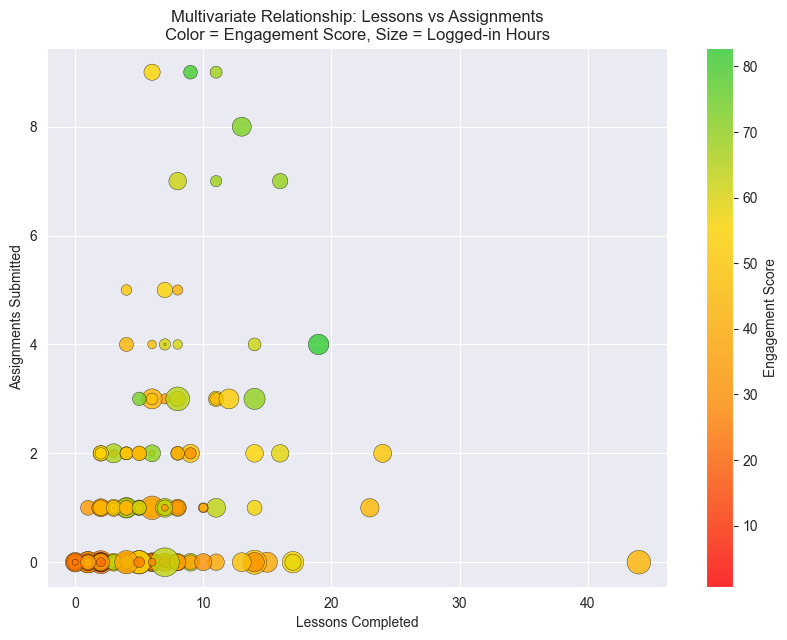

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a bold custom color map
traffic_cmap = LinearSegmentedColormap.from_list(
    "traffic",
    ["red", "darkorange", "gold", "limegreen"],
    N=256
)

plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    df["lessons"],
    df["assignments"],
    c=df["score"],                 # engagement score drives color
    s=df["logged in"] * 5,         # bubble size = logged in hours
    cmap=traffic_cmap,             # use the bold traffic-light palette
    alpha=0.8,                     # slightly higher opacity for clearer colors
    edgecolor="black",             # outline to make points pop
    linewidth=0.3
)

plt.title(
    "Multivariate Relationship: Lessons vs Assignments\n"
    "Color = Engagement Score, Size = Logged-in Hours"
)
plt.xlabel("Lessons Completed")
plt.ylabel("Assignments Submitted")

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Engagement Score")

plt.show()


### Interpretation
Higher engagement scores (indicated in green) tend to appear in regions where students have completed more lessons and submitted more assignments, although variation still exists. Larger markers (representing higher logged-in time) are also more common in these areas, suggesting a general association between broader activity and engagement.

Students with lower engagement scores (in red) cluster mostly near the lower end of lessons and assignments, which is expected. However, a few scattered points show low scores despite moderate activity, and some students with minimal activity still display mid-range scores. These irregularities are useful to highlight at this stage, as they may indicate noise, individual differences, or the need for further cleaning or feature refinement.


## 3.4 Summary of visual insights & trends

The visualisations from Step 3 collectively highlight several consistent patterns in the dataset:

- **Right-skewed behaviour:**
  Histograms and box plots indicate that behavioural variables such as `logged in`, `lessons`, `assignments`, and `posts` are right-skewed. Most students show relatively low levels of activity, while a smaller group exhibits significantly higher engagement. This is reflected in the long right tails and multiple outliers.

- **Presence of outliers:**
  Box plots reveal a number of high-value outliers across several behavioural variables, suggesting that some students behave very differently from the majority (exceptionally high app usage or unusually many completed tasks).

- **Variation in engagement:**
  The distribution of `score` shows considerable spread, indicating that engagement levels vary widely across students. Both histograms and box plots confirm a broad range of engagement outcomes.

- **Activity–engagement trend:**
  Scatter plots suggest a positive relationship between behavioural activity and engagement score. Students with higher values in `logged in`, `lessons`, `assignments`, or `posts` tend to have higher engagement scores, although the variability across individuals remains large.

- **Age patterns:**
  The distribution of `age` is concentrated around younger adults, with a small number of unusually high values clearly visible in the box plot, indicating the presence of outliers.

Overall, the visualisations suggest that **behavioural activity is associated with engagement**, while the dataset also contains a number of unusually high activity values that stand out from typical student patterns.


# 4. Identifying variable relationships

## 4.1 Correlation matrix

A correlation matrix is used here to provide an overview of how behavioural features and engagement score relate to one another.


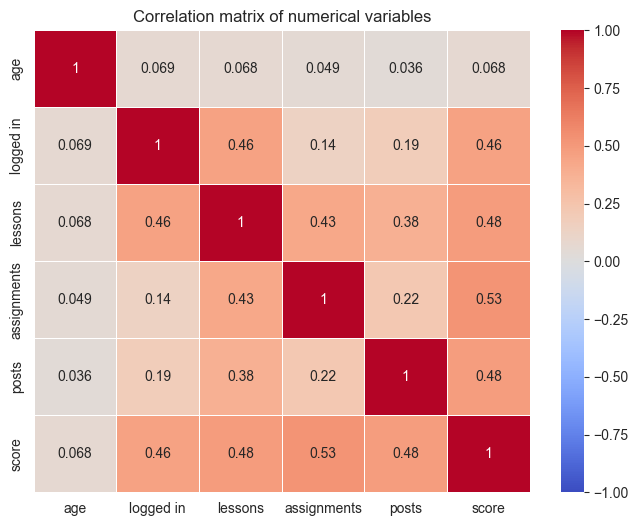

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numeric_cols = ["age", "logged in", "lessons", "assignments", "posts", "score"]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))                                 # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",      # Display correlation values
            vmin=-1, vmax=1, linewidths=0.5)               # Color scale from -1 to 1
plt.title("Correlation matrix of numerical variables")     # Title
plt.show()                                                 # Render the heatmap


### Interpretation

- The behavioural variables (`logged in`, `lessons`, `assignments`, and `posts`) all show positive correlations with `score`, indicating that higher activity levels tend to be associated with higher engagement.
- Among these variables, `assignments` and `lessons` display the strongest correlations with engagement score, suggesting they may be particularly significant indicators of student engagement.
- `age` shows little to no correlation with the other variables, indicating that age is not strongly related to behavioural activity or engagement within this dataset.
- Behavioural variables are also positively correlated with each other, which reflects that students who are active in one aspect of the platform tend to be active in other aspects as well.


# 5. Defining the focus of the analysis

## 5.1 Problem statement

The dataset contains demographic information, behavioural metrics, and engagement scores for students using a learning platform.
The visual and statistical exploration from the previous steps shows that engagement varies widely across individuals and appears related to several behavioural features.

The focus of this analysis is to investigate **which student behaviours are most strongly associated with higher engagement scores**.
Understanding these relationships can help identify which aspects of platform activity may contribute most to student engagement.
## 5.2 Hypotheses

Based on the exploratory analysis, the following hypothesis is proposed for statistical testing:

**H1:** Students who show higher levels of platform activity (more logged-in, completed lessons or submitted assignments) tend to have higher scores.

This hypothesis focuses on the observed positive patterns between behavioural metrics and engagement in the visualisations and correlation analysis.
## 5.3 Rationale based on EDA findings

The hypothesis is grounded in the patterns observed in Step 3 and Step 4:

- Scatter plots showed upward trends between behavioural activity variables (`logged in`, `lessons`, `assignments`, `posts`) and engagement score.
- The correlation matrix confirmed positive associations between these variables, with `assignments` and `lessons` showing some of the strongest relationships.
- Descriptive statistics indicated substantial variability in engagement and activity levels, suggesting that differences in behaviour may meaningfully influence engagement outcomes.

These findings jointly justify examining whether higher activity levels are statistically associated with higher engagement scores.

